# London energy consumption prediction
Johannes Horn - 18/01/2021

![london-image](london.jpg "london-image")

# Introduction and motivation

As an electricity supplier you want to be able to predict the energy
consumption as accurate as possible for each customer, so that they do
not have to pay or get back so much afterwards.

The idea is to predict the current energy consumption of a single household in
London based on several different features. The prediciton of single households also could be added up to predict the total amount of energy consumption of London.

# Dataset
A dataset with which it is possible to experiment is the “Smart meters in London” - Dataset, available on kaggle:
https://www.kaggle.com/jeanmidev/smart-meters-in-london

It contains the energy consumption readings for a sample of 5,567 households in London for each 30 minutes from 2011-2014. In total it has about 167 Million data samples and takes rouhly 10 Gigabytes of space. 
It has features like:

* household_id, current energy consumption, timestamp, type of power supplier contract, ACORN-group (A-U, depends on 74 unique properties:
  age, house type & size, hobbies, monthly income...)
 
  "Acorn is a powerful consumer classification that segments the UK population." -https://acorn.caci.co.uk/
  
  
* Separately: Weather & holiday information
* For each ACORN property: Distribution over ACORN-groups

# Create dataframe from dataset:

The given dataset consist of four different tables we need to bring together:

* 1.) half hourly energy consumption (household_id, timestamp, energy consumed)


* 2.) household information (household_id, ACORN category(A-Q), ACORN group, block).

  "Acorn is a powerful consumer classification that segments the UK population." -https://acorn.caci.co.uk/
  

* 3.) ACORN details (it evaluates 826 properties of persons depending on their ACORN category)


* 4.) hourly weather conditions ( visibility, windBearing, temperature, time, dewPoint, pressure, \
  apparentTemperature, windSpeed, precipType, icon, humidity, summary)

  dataset 1 & 2 can simply be joined by the household id

  dataset 3 can be used to determine the ACORN category of someone

  dataset 4 can be joined only for every 2nd row since its only recorded every 60 mins instead of 30. 
  All values in between can be interpolated.  

We will use the Pandas library to create datasets and manage data. Pandas is one of the most popular science tools for Python. It easily lets you analyze, plot and process datatables.

## 1.) half hourly energy consumption (household_id, timestamp, energy consumed)

It turns out some alogrithms and operations on the data take extremely long if we use all data. Therefore only 12 out of 112 of euqally sized files of half hourly energy consumption are taken into account.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#create emtpy data frame
half_hourly_energy_consumption = pd.DataFrame()

#add file by file
for num in range(0,12):#112
    singlefile = pd.read_csv("archive/halfhourly_dataset/halfhourly_dataset/block_"+str(num)+".csv")
    half_hourly_energy_consumption = half_hourly_energy_consumption.append(singlefile)
    print(num, "done")
    
half_hourly_energy_consumption


0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done


/home/jh234/anaconda3/envs/ads/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


9 done
10 done
11 done


,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0
...,...,...,...
1564817,MAC005318,2014-02-27 22:00:00.0000000,0.343
1564818,MAC005318,2014-02-27 22:30:00.0000000,0.906
1564819,MAC005318,2014-02-27 23:00:00.0000000,0.252
1564820,MAC005318,2014-02-27 23:30:00.0000000,0.214


From 12 files we have 17.601.109 data samples.
For now we have only the household Id, a timestamp and the energy consumption per datasample. So we need to join the household information easily by household id from the "informations_households" table.

## 2.) household information (household_id, ACORN category(A-Q), ACORN group, block).

In [3]:
#2 household information
household_information = pd.read_csv("archive/informations_households.csv")
household_information

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [4]:
# join household information to half hourly energy consumption by household id

dataset1_2 =  pd.merge(half_hourly_energy_consumption, household_information, on='LCLid', how='inner')
del dataset1_2['file']
dataset1_2

,LCLid,tstp,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped
0,MAC000002,2012-10-12 00:30:00.0000000,0,Std,ACORN-A,Affluent
1,MAC000002,2012-10-12 01:00:00.0000000,0,Std,ACORN-A,Affluent
2,MAC000002,2012-10-12 01:30:00.0000000,0,Std,ACORN-A,Affluent
3,MAC000002,2012-10-12 02:00:00.0000000,0,Std,ACORN-A,Affluent
4,MAC000002,2012-10-12 02:30:00.0000000,0,Std,ACORN-A,Affluent
...,...,...,...,...,...,...
17601104,MAC005318,2014-02-27 22:00:00.0000000,0.343,Std,ACORN-D,Affluent
17601105,MAC005318,2014-02-27 22:30:00.0000000,0.906,Std,ACORN-D,Affluent
17601106,MAC005318,2014-02-27 23:00:00.0000000,0.252,Std,ACORN-D,Affluent
17601107,MAC005318,2014-02-27 23:30:00.0000000,0.214,Std,ACORN-D,Affluent


We successfully added 3 features to our dataset:
    * standard or Time of Use contract
    * Acorngroup: A,B,C..Q
    * Acorn-category, which summarises all acorn groups again in bins.

In [5]:
#For each feature (column) identify its mean, standard deviation, and 5 five most repeated values
print("energy(kWh/hh): ")
print("mean:", pd.to_numeric(dataset1_2["energy(kWh/hh)"].replace("Null", None)).mean())
print("std:", pd.to_numeric(dataset1_2["energy(kWh/hh)"].replace("Null", None)).std())

energy(kWh/hh): 
mean: 0.3037298794562206
std: 0.38780847366861193


In [6]:
for (columnName, columnData) in dataset1_2.iteritems():
    print(columnName, ":\n", columnData.value_counts()[:5])
    print("------------------------------")

LCLid :
 MAC000155    39705
MAC000193    39480
MAC000194    39462
MAC000246    39245
MAC000017    39087
Name: LCLid, dtype: int64
------------------------------
tstp :
 2012-11-05 19:30:00.0000000    595
2012-11-27 22:30:00.0000000    595
2012-11-03 21:00:00.0000000    595
2012-11-30 04:30:00.0000000    595
2012-11-16 19:00:00.0000000    595
Name: tstp, dtype: int64
------------------------------
energy(kWh/hh) :
  0         81869
 0.06      73286
 0.061     73071
 0.063     72943
 0.062     72812
Name: energy(kWh/hh), dtype: int64
------------------------------
stdorToU :
 Std    13307451
ToU     4293658
Name: stdorToU, dtype: int64
------------------------------
Acorn :
 ACORN-D    8182425
ACORN-A    4448643
ACORN-C    4241162
ACORN-B     691619
ACORN-       37260
Name: Acorn, dtype: int64
------------------------------
Acorn_grouped :
 Affluent    17563849
ACORN-         37260
Name: Acorn_grouped, dtype: int64
------------------------------


Plotting of features of household data set:

<AxesSubplot:ylabel='Frequency'>

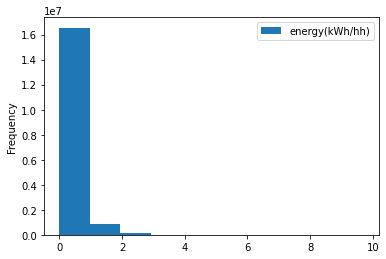

In [7]:
#energy
pd.DataFrame(pd.to_numeric(dataset1_2["energy(kWh/hh)"].replace("Null", None))).plot(kind = "hist")

In [8]:
#time
#pd.DataFrame(pd.to_numeric(pd.to_datetime(dataset1_2['tstp']))).plot(kind = "hist")

<AxesSubplot:>

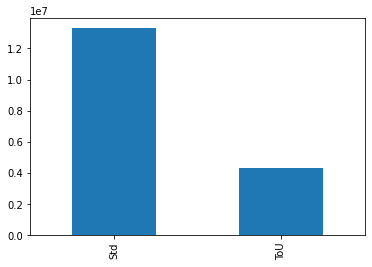

In [9]:
#contract
pd.Categorical(dataset1_2["stdorToU"]).value_counts().plot(kind='bar')

<AxesSubplot:>

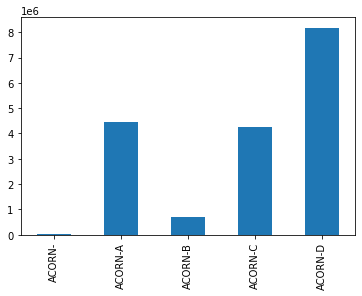

In [10]:
#ACORN Group
pd.Categorical(dataset1_2["Acorn"]).value_counts().plot(kind='bar')

As we can see the ACORN-groups are unevenly distributed, we should keep hat in mind as it could cause some troubles, for example if group ACORN-B has a high influence of the energy consumtion, a model might not be able to learn it from the imbalanced data.

## 3.) ACORN details (it evaluates 74 properties of persons depending on their ACORN category)

In [11]:
# 3 lets have a look at the ACORN details
ACORN_details = pd.read_csv("archive/acorn_details.csv", encoding= 'unicode_escape')
print("Number of total Nans in Dataframe: ", ACORN_details.isnull().sum().sum())

ACORN_details


Number of total Nans in Dataframe:  0


,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


Luckiliy we have no Nan values in our dataframe, sowe dont need to take care of that. The columns MAIN CATEGORIES, CATEGORIES and REFERENCE can be merged to one column by simply adding the strings. 

In [12]:
ACORN_details['REFERENCE'] = \
ACORN_details["MAIN CATEGORIES"] + "_" \
+ ACORN_details["CATEGORIES"] + "_"  \
+ ACORN_details["REFERENCE"]

del ACORN_details['MAIN CATEGORIES']
del ACORN_details['CATEGORIES']


In [13]:
#lets have a look at the merged column: "REFERENCE"
ACORN_details

,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION_Age_Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION_Age_Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION_Age_Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION_Age_Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION_Age_Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,LEISURE TIME_Holiday Destination/Type_Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME_Holiday Destination/Type_Activity...,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME_Holiday Destination/Type_Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME_Holiday Destination/Type_Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0


Our goal is to use this table to determine the most likely ACORN-group depending in the referneces given of someone. For example if someine is 14 years old the reference "POPULATION_Age_Age 5-17" should be used. For ech reference we have a dsitribution over all ACORN-groups. So we can calculate the most likely ACORN-group by adding the realive parts of all ACORN-groups together from all references given. the ACORN-group with the most added relative shares is the most probable one

In [14]:
#calculate relative shares instead of  the actual count
ACORN_details_relative = ACORN_details.copy()
ACORN_details_relative = ACORN_details_relative.set_index('REFERENCE')
ACORN_details_relative = ACORN_details_relative.div(ACORN_details_relative.sum(axis=1), axis=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(ACORN_details_relative)

,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
REFERENCE,,,,,,,,,,,,,,,,,
POPULATION_Age_Age 0-4,0.045779,0.049346,0.042806,0.059453,0.071344,4.577883e-02,0.057669,0.057669,0.037455,0.070749,0.039834,0.067776,0.067182,0.052913,0.073127,0.082045,0.079073
POPULATION_Age_Age 5-17,0.071081,0.066221,0.052855,0.041920,0.057108,5.771567e-02,0.061968,0.064399,0.040705,0.057716,0.038882,0.065614,0.070474,0.052248,0.054070,0.082625,0.064399
POPULATION_Age_Age 18-24,0.033791,0.038543,0.035375,0.056494,0.052798,3.748680e-02,0.043823,0.046990,0.032735,0.054910,0.242344,0.051214,0.050686,0.045407,0.061774,0.057550,0.058078
POPULATION_Age_Age 25-34,0.029148,0.035314,0.034753,0.110426,0.084641,3.699552e-02,0.050448,0.049327,0.035314,0.073991,0.081278,0.061099,0.053812,0.050448,0.078475,0.067265,0.067265
POPULATION_Age_Age 35-49,0.060570,0.062352,0.054038,0.073634,0.070071,5.522565e-02,0.060570,0.061164,0.045131,0.065914,0.039786,0.058789,0.058195,0.053444,0.060570,0.061164,0.059382
POPULATION_Age_Age 50-64,0.074970,0.073156,0.072551,0.043531,0.049577,7.617896e-02,0.065901,0.064692,0.067715,0.054414,0.024788,0.057437,0.058041,0.062273,0.053809,0.047158,0.053809
POPULATION_Age_Aged 65-74,0.074895,0.071899,0.091072,0.032954,0.036549,8.627921e-02,0.064709,0.062313,0.109047,0.043140,0.017376,0.054524,0.055722,0.074895,0.043739,0.035351,0.045536
POPULATION_Age_Aged 75 plus,0.068044,0.062576,0.095383,0.029769,0.034629,7.108141e-02,0.059538,0.058323,0.133657,0.040097,0.019441,0.052855,0.058323,0.092345,0.043742,0.034022,0.046173
POPULATION_Geography_England,0.062757,0.059238,0.060411,0.066862,0.062170,4.398827e-02,0.062757,0.062170,0.059824,0.062170,0.055718,0.054545,0.056891,0.052199,0.056891,0.064516,0.056891


In [15]:
#as an exmaple for three properties of a person get the most propbable ACORN-GROUP

testcategories = ["POPULATION_Age_Age 25-34", "POPULATION_Geography_Scotland", "TRANSPORT_Main Car Class_Luxury or Executive"]

usecase = ACORN_details_relative.loc[testcategories].copy()
usecase = usecase.append(pd.Series(usecase.sum(),name='Total_prop'))
print("Most likely ACORN-Group:" ,usecase.idxmax(axis=1)["Total_prop"])

usecase
                  


Most likely ACORN-Group: ACORN-A


,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
REFERENCE,,,,,,,,,,,,,,,,,
POPULATION_Age_Age 25-34,0.029148,0.035314,0.034753,0.110426,0.084641,0.036996,0.050448,0.049327,0.035314,0.073991,0.081278,0.061099,0.053812,0.050448,0.078475,0.067265,0.067265
POPULATION_Geography_Scotland,0.052602,0.059389,0.049208,0.026584,0.052602,0.081448,0.030543,0.026018,0.054864,0.029977,0.094457,0.064480,0.068439,0.109729,0.078620,0.017534,0.103507
TRANSPORT_Main Car Class_Luxury or Executive,0.385225,0.053840,0.055092,0.103088,0.063022,0.022120,0.031720,0.030885,0.032137,0.024624,0.053840,0.029633,0.030050,0.020451,0.020451,0.023790,0.020033
Total_prop,0.466975,0.148543,0.139053,0.240098,0.200265,0.140564,0.112711,0.106230,0.122315,0.128593,0.229575,0.155211,0.152301,0.180628,0.177546,0.108588,0.190805


So we are now able to determine the most likely ACORN group given several properties of a person.

## 4.) hourly weather conditions ( visibility, windBearing, temperature, time, dewPoint, pressure, apparentTemperature, windSpeed, precipType, icon, humidity, summary)

In [16]:
# 4 hourly weather conditions
hourly_weather_conditions = pd.read_csv("archive/weather_hourly_darksky.csv")
hourly_weather_conditions

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
4,1.85,111,9.26,2011-11-11 04:00:00,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,2014-02-15 19:00:00,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy
21161,13.78,249,6.56,2014-02-15 20:00:00,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear
21162,14.31,248,6.47,2014-02-15 21:00:00,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear
21163,14.31,248,5.96,2014-02-15 22:00:00,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear


### explore weather timedata

visibility
mean: 11.166485235057877
std: 3.099336718512389
5 most repeated values:
 13.07    816
12.13    557
13.52    521
12.26    516
16.09    265
Name: visibility, dtype: int64
------------------------------------
windBearing
mean: 195.68589652728562
std: 90.6294531658618
5 most repeated values:
 239    168
248    154
241    154
219    153
212    153
Name: windBearing, dtype: int64
------------------------------------
temperature
mean: 10.471485943775102
std: 5.781903926139468
5 most repeated values:
 9.13    35
9.11    31
7.54    31
8.07    30
9.08    30
Name: temperature, dtype: int64
------------------------------------
dewPoint
mean: 6.530501299314906
std: 5.041965163443226
5 most repeated values:
 8.11    36
7.64    35
8.21    33
7.09    33
8.07    33
Name: dewPoint, dtype: int64
------------------------------------
pressure
mean: 1014.125152704236
std: 11.3883371170865
5 most repeated values:
 1018.15    32
1017.77    19
1010.34    18
1017.99    17
1016.08    17
Name: pressure

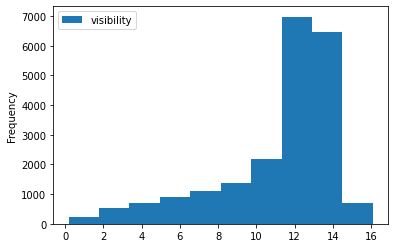

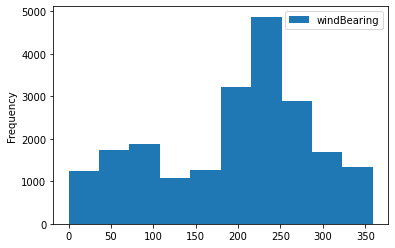

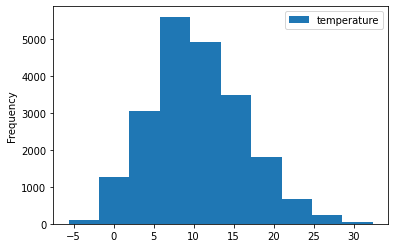

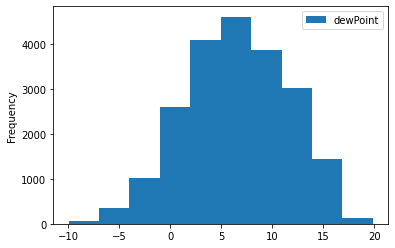

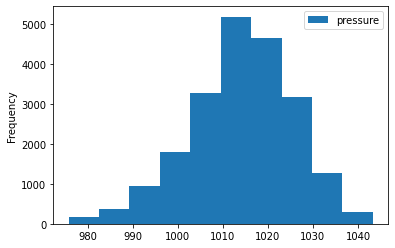

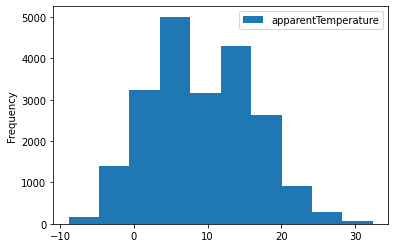

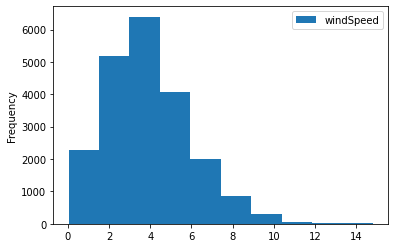

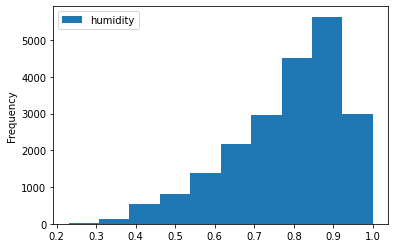

In [17]:
#hourly_weather_conditions
from pandas.api.types import is_numeric_dtype
for (columnName, columnData) in hourly_weather_conditions.iteritems():
    if is_numeric_dtype(hourly_weather_conditions[columnName]):
        print(columnName)
        print("mean:", pd.to_numeric(hourly_weather_conditions[columnName].replace("Null", None)).mean())
        print("std:", pd.to_numeric(hourly_weather_conditions[columnName].replace("Null", None)).std())
        val_counts = hourly_weather_conditions[columnName].replace("Null", None).value_counts()
        print("5 most repeated values:\n", val_counts.iloc[:5])
        pd.DataFrame(hourly_weather_conditions[columnName]).plot(kind = "hist")
        print("------------------------------------")


The weather data seems to be correct and without outliers.

In [18]:
# 1 check_datatype of time coulmn of hourly weather conditions
hourly_weather_conditions["time"].dtype

dtype('O')

In [19]:
# 1 since its object cast it to datetime
hourly_weather_conditions['time'] = pd.to_datetime(hourly_weather_conditions['time'])

In [20]:
# 1 should be datetime now
hourly_weather_conditions["time"].dtype

dtype('<M8[ns]')

In [21]:
# we need to merge the weather dataset with the household consumption data by joining it over the timestamps
#check timestamps by visualzing
import matplotlib.pyplot as plt

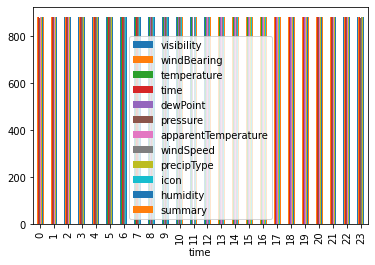

In [22]:
# 1 check distribution of timestamps over 24hrs of weather data
res = hourly_weather_conditions.groupby(hourly_weather_conditions["time"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()

The data of timestamps over 24hrs of weather data seems to be equally distributed.

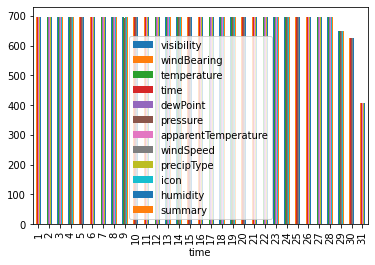

In [23]:
# 1 check distribution oftimestamps over days of weather data
res = hourly_weather_conditions.groupby(hourly_weather_conditions["time"].dt.day).count()
res.plot(kind="bar")
plt.show()

The data of timestamps over days of weather data seems to be equally distributed. Each month has at least 28 days. 1 out of 4 Februaries has 29 days instead of 28, whenevery its a leap year. Other months obvioulsy have 30 or 31 days. 

In [24]:
# 1check earliest and latest date of weather data
display(hourly_weather_conditions["time"].min())
display(hourly_weather_conditions["time"].max())



Timestamp('2011-11-01 00:00:00')

Timestamp('2014-03-31 22:00:00')

### explore household consumption timedata

In [25]:
#2 check_datatype of time coulmn
dataset1_2["tstp"].dtype

dtype('O')

In [26]:
#since its object castr itto datetime
dataset1_2['tstp'] = pd.to_datetime(dataset1_2['tstp'])

In [27]:
#should be datetimenow
dataset1_2["tstp"].dtype

dtype('<M8[ns]')

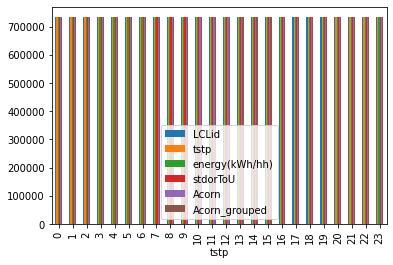

In [28]:
# 2 check distribution of timestamps over 24hrs of energy consumption data
res = dataset1_2.groupby(dataset1_2["tstp"].dt.hour).count().reindex(np.arange(24), fill_value=0)
res.plot(kind="bar")
plt.show()


The data of timestamps over 24hrs of consumption data seems to be equally distributed.

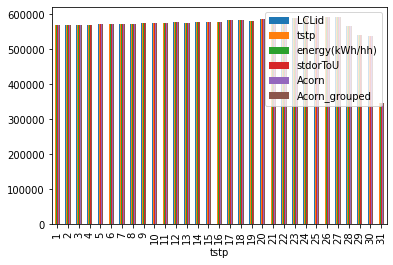

In [29]:
# 2 check distribution of timestamps over days of consumption data
res = dataset1_2.groupby(dataset1_2["tstp"].dt.day).count()
res.plot(kind="bar")
plt.show()

The data of timestamps over days of weather data seems to be equally distributed with some slight variations.
Each month has at least 28 days. 1 out of 4 Februaries has 29 days instead of 28, whenevery its a leap year. Other months obvioulsy have 30 or 31 days. 

In [30]:
# 2 check earliest and latest date of consumtion data and compare to weather datetime data
print("Weather Data: ")
print("start:")
display(hourly_weather_conditions["time"].min())
print("end:")
display(hourly_weather_conditions["time"].max())
print("Consumption Data: ")
print("start:")
display(dataset1_2["tstp"].min())
print("end")
display(dataset1_2["tstp"].max())

Weather Data: 
start:


Timestamp('2011-11-01 00:00:00')

end:


Timestamp('2014-03-31 22:00:00')

Consumption Data: 
start:


Timestamp('2011-11-23 13:00:00')

end


Timestamp('2014-02-28 00:00:00')

## merging weather data into household consumtion data

As we can see the consumption data starts a little bit later than the weather data. Also the weather data ends later than the consumption data. So we should be able to just merge the weather data for all timestamps avaible in the consumption data. 
Since the weather data was only recorded every 60 mins and the consumption data every 30 mins, we need to interpolate the missing values.

In [31]:
#rename column of consumption dataset so its the same name "time" to "time" as in the weather datset
dataset1_2 = dataset1_2.rename(columns={'tstp': 'time'})
# leftjoin household information to half hourly energy consumption by household id

dataset1_2_4 =  pd.merge(dataset1_2, hourly_weather_conditions, on='time', how='left')

In [32]:
dataset1_2_4

,LCLid,time,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-12 00:30:00,0,Std,ACORN-A,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAC000002,2012-10-12 01:00:00,0,Std,ACORN-A,Affluent,13.50,250.0,13.09,11.37,1000.10,13.09,6.77,rain,wind,0.89,Breezy and Mostly Cloudy
2,MAC000002,2012-10-12 01:30:00,0,Std,ACORN-A,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MAC000002,2012-10-12 02:00:00,0,Std,ACORN-A,Affluent,13.50,252.0,12.54,10.27,1000.51,12.54,6.46,rain,partly-cloudy-night,0.86,Mostly Cloudy
4,MAC000002,2012-10-12 02:30:00,0,Std,ACORN-A,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601104,MAC005318,2014-02-27 22:00:00,0.343,Std,ACORN-D,Affluent,14.00,216.0,4.10,1.64,1005.67,1.41,3.02,rain,clear-night,0.84,Clear
17601105,MAC005318,2014-02-27 22:30:00,0.906,Std,ACORN-D,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17601106,MAC005318,2014-02-27 23:00:00,0.252,Std,ACORN-D,Affluent,14.03,200.0,3.93,1.61,1004.62,1.42,2.75,rain,clear-night,0.85,Clear
17601107,MAC005318,2014-02-27 23:30:00,0.214,Std,ACORN-D,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
#get number of rows with NaN values
def get_number_of_rows_with_NaN_values(df):
    mask = False
    for row in dataset1_2_4.columns: 
        mask = mask | df[row].isnull()
    print("Number of rows with NaN values:")
    print(df[mask].shape[0])

    percent = df[mask].shape[0] / df.shape[0] * 100
    print("It corresponds to " + str(percent) + " percent of all timestamps")
    
get_number_of_rows_with_NaN_values(dataset1_2_4)

Number of rows with NaN values:
8807764
It corresponds to 50.040960487205666 percent of all timestamps


As expected for roughly every 2nd timestamp we have no weather data and it needs to be interpolted.

In [385]:
#check if any NA value in time column
dataset1_2_4['time'].isna().sum()

0

There are no NaN values in the time coumn so we can use it to itnerpolate the other values.

In [386]:
dataset1_2_4_interpolated = dataset1_2_4.interpolate(method="linear")
dataset1_2_4_interpolated[:10]

,LCLid,time,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-12 00:30:00,0,Std,ACORN-A,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAC000002,2012-10-12 01:00:00,0,Std,ACORN-A,Affluent,13.50,250.0,13.090,11.370,1000.100,13.090,6.770,rain,wind,0.890,Breezy and Mostly Cloudy
2,MAC000002,2012-10-12 01:30:00,0,Std,ACORN-A,Affluent,13.50,251.0,12.815,10.820,1000.305,12.815,6.615,NaN,NaN,0.875,NaN
3,MAC000002,2012-10-12 02:00:00,0,Std,ACORN-A,Affluent,13.50,252.0,12.540,10.270,1000.510,12.540,6.460,rain,partly-cloudy-night,0.860,Mostly Cloudy
4,MAC000002,2012-10-12 02:30:00,0,Std,ACORN-A,Affluent,13.22,251.5,12.240,9.790,1000.620,12.240,6.415,NaN,NaN,0.850,NaN
5,MAC000002,2012-10-12 03:00:00,0,Std,ACORN-A,Affluent,12.94,251.0,11.940,9.310,1000.730,11.940,6.370,rain,partly-cloudy-night,0.840,Mostly Cloudy
6,MAC000002,2012-10-12 03:30:00,0,Std,ACORN-A,Affluent,12.77,251.0,11.705,9.225,1000.980,11.705,6.500,NaN,NaN,0.850,NaN
7,MAC000002,2012-10-12 04:00:00,0,Std,ACORN-A,Affluent,12.60,251.0,11.470,9.140,1001.230,11.470,6.630,rain,partly-cloudy-night,0.860,Mostly Cloudy
8,MAC000002,2012-10-12 04:30:00,0,Std,ACORN-A,Affluent,12.65,252.0,11.170,8.875,1001.600,11.170,6.590,NaN,NaN,0.860,NaN
9,MAC000002,2012-10-12 05:00:00,0,Std,ACORN-A,Affluent,12.70,253.0,10.870,8.610,1001.970,10.870,6.550,rain,partly-cloudy-night,0.860,Mostly Cloudy


We can see numrical weather data could be interpolated using the linear approach. Categorial data cannot be interpolated this way. We use the pad method which takes nearby values instead of interpolating.

In [387]:
dataset1_2_4_interpolated = dataset1_2_4_interpolated.interpolate(method="pad")
dataset1_2_4_interpolated

,LCLid,time,energy(kWh/hh),stdorToU,Acorn,Acorn_grouped,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,MAC000002,2012-10-12 00:30:00,0,Std,ACORN-A,Affluent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MAC000002,2012-10-12 01:00:00,0,Std,ACORN-A,Affluent,13.500,250.0,13.090,11.370,1000.100,13.090,6.770,rain,wind,0.890,Breezy and Mostly Cloudy
2,MAC000002,2012-10-12 01:30:00,0,Std,ACORN-A,Affluent,13.500,251.0,12.815,10.820,1000.305,12.815,6.615,rain,wind,0.875,Breezy and Mostly Cloudy
3,MAC000002,2012-10-12 02:00:00,0,Std,ACORN-A,Affluent,13.500,252.0,12.540,10.270,1000.510,12.540,6.460,rain,partly-cloudy-night,0.860,Mostly Cloudy
4,MAC000002,2012-10-12 02:30:00,0,Std,ACORN-A,Affluent,13.220,251.5,12.240,9.790,1000.620,12.240,6.415,rain,partly-cloudy-night,0.850,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17601104,MAC005318,2014-02-27 22:00:00,0.343,Std,ACORN-D,Affluent,14.000,216.0,4.100,1.640,1005.670,1.410,3.020,rain,clear-night,0.840,Clear
17601105,MAC005318,2014-02-27 22:30:00,0.906,Std,ACORN-D,Affluent,14.015,208.0,4.015,1.625,1005.145,1.415,2.885,rain,clear-night,0.845,Clear
17601106,MAC005318,2014-02-27 23:00:00,0.252,Std,ACORN-D,Affluent,14.030,200.0,3.930,1.610,1004.620,1.420,2.750,rain,clear-night,0.850,Clear
17601107,MAC005318,2014-02-27 23:30:00,0.214,Std,ACORN-D,Affluent,13.330,195.0,3.870,1.570,1004.095,1.445,2.640,rain,clear-night,0.850,Clear


In [388]:
get_number_of_rows_with_NaN_values(dataset1_2_4_interpolated)

Number of rows with NaN values:
1
It corresponds to 5.681460185264463e-06 percent of all timestamps


Now all values are interpolated successfully. The first sample cannot be interpolated. So we simply remove it from the dataset.

In [389]:
dataset1_2_4_interpolated = dataset1_2_4_interpolated.iloc[1:]

In [390]:
get_number_of_rows_with_NaN_values(dataset1_2_4_interpolated)

Number of rows with NaN values:
0
It corresponds to 0.0 percent of all timestamps


In [391]:
dataset1_2_4_interpolated.shape

(17601108, 17)

We finally have a merged Dataset consisting out of 17 features and 17.601.108 samples. Eleven of the features are weather based, the others are related to the ACORN-group, contract type and obviously time and engergy consumption.

Since the analysis should be year independent, we extract month, weekday and hour from datetime.

In [ ]:
dataset1_2_4_interpolated['month'] = dataset1_2_4_interpolated.time.dt.month 
dataset1_2_4_interpolated['day_name'] = dataset1_2_4_interpolated.time.dt.day_name() 
dataset1_2_4_interpolated['hour'] = dataset1_2_4_interpolated.time.dt.hour 

In [393]:
#check all dtypes
dataset1_2_4_interpolated.dtypes

LCLid                          object
time                   datetime64[ns]
energy(kWh/hh)                 object
stdorToU                       object
Acorn                          object
Acorn_grouped                  object
visibility                    float64
windBearing                   float64
temperature                   float64
dewPoint                      float64
pressure                      float64
apparentTemperature           float64
windSpeed                     float64
precipType                     object
icon                           object
humidity                      float64
summary                        object
month                           int64
day_name                       object
hour                            int64
dtype: object

We should cast the in total 9 object types in numerical or categorical data types so they can be used properly by algorithms. In Pandas Dataframe all strings are treated as object. Before converting we check for values Nan and "Null" values.

In [394]:
dataset1_2_4_interpolated.isna().sum()

LCLid                  0
time                   0
energy(kWh/hh)         0
stdorToU               0
Acorn                  0
Acorn_grouped          0
visibility             0
windBearing            0
temperature            0
dewPoint               0
pressure               0
apparentTemperature    0
windSpeed              0
precipType             0
icon                   0
humidity               0
summary                0
month                  0
day_name               0
hour                   0
dtype: int64

In [395]:
for column in dataset1_2_4_interpolated:
    if dataset1_2_4_interpolated[column].dtype == object:
        print (column + " has " + str(dataset1_2_4_interpolated[column].str.count("Null").sum()) + " strings which equal 'Null'.")


LCLid has 0 strings which equal 'Null'.
energy(kWh/hh) has 599.0 strings which equal 'Null'.
stdorToU has 0 strings which equal 'Null'.
Acorn has 0 strings which equal 'Null'.
Acorn_grouped has 0 strings which equal 'Null'.
precipType has 0 strings which equal 'Null'.
icon has 0 strings which equal 'Null'.
summary has 0 strings which equal 'Null'.
day_name has 0 strings which equal 'Null'.


In the whole Dataset we have no NaN-values but 599 "Null" entries for energy.
They will be converted as NaN values. We can drop these data samples later, after the conversion.

In [ ]:
#fix objects dtypes
#reminder:
#LCLid                          object
#energy(kWh/hh)                 object
#stdorToU                       object
#Acorn                          object
#Acorn_grouped                  object
#precipType                     object
#icon                           object
#summary                        object
#day_name                       object

dataset1_2_4_interpolated['LCLid'] = dataset1_2_4_interpolated['LCLid'].astype("category")
#using errors='coerce' so that any non convertable values will be converted to NaN.
dataset1_2_4_interpolated['energy(kWh/hh)'] = pd.to_numeric(dataset1_2_4_interpolated['energy(kWh/hh)'], errors='coerce')
dataset1_2_4_interpolated['stdorToU'] = dataset1_2_4_interpolated['stdorToU'].astype("category")
dataset1_2_4_interpolated['Acorn'] = dataset1_2_4_interpolated['Acorn'].astype("category")
dataset1_2_4_interpolated['Acorn_grouped'] = dataset1_2_4_interpolated['Acorn_grouped'].astype("category")
dataset1_2_4_interpolated['precipType'] = dataset1_2_4_interpolated['precipType'].astype("category")
dataset1_2_4_interpolated['icon'] = dataset1_2_4_interpolated['icon'].astype("category")
dataset1_2_4_interpolated['summary'] = dataset1_2_4_interpolated['summary'].astype("category")
dataset1_2_4_interpolated['day_name'] = dataset1_2_4_interpolated['day_name'].astype("category")




In [397]:
dataset1_2_4_interpolated.isna().sum()

LCLid                    0
time                     0
energy(kWh/hh)         599
stdorToU                 0
Acorn                    0
Acorn_grouped            0
visibility               0
windBearing              0
temperature              0
dewPoint                 0
pressure                 0
apparentTemperature      0
windSpeed                0
precipType               0
icon                     0
humidity                 0
summary                  0
month                    0
day_name                 0
hour                     0
dtype: int64

Since the "Null" string values of energy got converted to Nan, we need to drop these 599 data samples.

In [398]:
before = dataset1_2_4_interpolated.shape[0]
print("Before dropping NaN rows: " + str(before))
dataset1_2_4_interpolated = dataset1_2_4_interpolated[dataset1_2_4_interpolated['energy(kWh/hh)'].notna()]
after = dataset1_2_4_interpolated.shape[0]
diff = before - after
print("After dropping NaN rows: " + str(after))
print("A total of : " + str(diff) + " rows were dropped.")



Before dropping NaN rows: 17601108
After dropping NaN rows: 17600509
A total of : 599 rows were dropped.


In [399]:
#confirmall dtypes
dataset1_2_4_interpolated.dtypes

LCLid                        category
time                   datetime64[ns]
energy(kWh/hh)                float64
stdorToU                     category
Acorn                        category
Acorn_grouped                category
visibility                    float64
windBearing                   float64
temperature                   float64
dewPoint                      float64
pressure                      float64
apparentTemperature           float64
windSpeed                     float64
precipType                   category
icon                         category
humidity                      float64
summary                      category
month                           int64
day_name                     category
hour                            int64
dtype: object

For categorical data we check all categories if they make sense.

In [400]:
for column in dataset1_2_4_interpolated:
    if dataset1_2_4_interpolated[column].dtype.name == 'category':
        print("----------------")
        print(column)
        print (dataset1_2_4_interpolated[column].unique)


    


----------------
LCLid
<bound method Series.unique of 1           MAC000002
2           MAC000002
3           MAC000002
4           MAC000002
5           MAC000002
              ...    
17601104    MAC005318
17601105    MAC005318
17601106    MAC005318
17601107    MAC005318
17601108    MAC005318
Name: LCLid, Length: 17600509, dtype: category
Categories (600, object): ['MAC000002', 'MAC000005', 'MAC000017', 'MAC000026', ..., 'MAC005517', 'MAC005523', 'MAC005550', 'MAC005565']>
----------------
stdorToU
<bound method Series.unique of 1           Std
2           Std
3           Std
4           Std
5           Std
           ... 
17601104    Std
17601105    Std
17601106    Std
17601107    Std
17601108    Std
Name: stdorToU, Length: 17600509, dtype: category
Categories (2, object): ['Std', 'ToU']>
----------------
Acorn
<bound method Series.unique of 1           ACORN-A
2           ACORN-A
3           ACORN-A
4           ACORN-A
5           ACORN-A
             ...   
17601104    ACORN-D
176

The Categories seem to be fine. At the next step we map the periodic variables month and day onto a circle such that the lowest value for that variable appears right next to the largest value. Otherwise for example for days 23 would be furthest away from 0 even though it is the closest value to 0.

In [401]:
dataset1_2_4_interpolated['hour_sin'] = np.sin(dataset1_2_4_interpolated.hour*(2.*np.pi/24))
dataset1_2_4_interpolated['hour_cos'] = np.cos(dataset1_2_4_interpolated.hour*(2.*np.pi/24))
dataset1_2_4_interpolated['month_sin'] = np.sin((dataset1_2_4_interpolated.month-1)*(2.*np.pi/12))
dataset1_2_4_interpolated['month_cos'] = np.cos((dataset1_2_4_interpolated.month-1)*(2.*np.pi/12))

At a last step we should one-hot-encode the categorical data so it is numerical and can be used by algorihtms like linear regression.
Also its helps to calculate each variables independence and correlation. We drop one dimension per categroy from the representation so as to avoid dependency among the variables.

In [402]:
#recall dtypes
dataset1_2_4_interpolated.dtypes

LCLid                        category
time                   datetime64[ns]
energy(kWh/hh)                float64
stdorToU                     category
Acorn                        category
Acorn_grouped                category
visibility                    float64
windBearing                   float64
temperature                   float64
dewPoint                      float64
pressure                      float64
apparentTemperature           float64
windSpeed                     float64
precipType                   category
icon                         category
humidity                      float64
summary                      category
month                           int64
day_name                     category
hour                            int64
hour_sin                      float64
hour_cos                      float64
month_sin                     float64
month_cos                     float64
dtype: object

In [403]:
def categorical_to_onehot(df, coulmnname):
    dummies = pd.get_dummies(df[coulmnname], prefix=coulmnname, drop_first=True)    
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([coulmnname],axis=1)
    return df
    

In [404]:
# we should one-hot-encode:

#stdorToU 
#dropped: std
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'stdorToU')

#Acorn   
#dropped: ACORN-E
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'Acorn')                                                              

#Acorn_grouped
#dropped: Adversity
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'Acorn_grouped')

#precipType
#dropped: rain
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'precipType')

#icon         
#dropped: clear-day
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'icon')

#summary 
#dropped: Breezy
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'summary')

#day_name   
#dropped: friday
dataset1_2_4_interpolated = categorical_to_onehot(dataset1_2_4_interpolated, 'day_name')
           



After one hot encoding the categorical features, wedrop unnecessary features like "time" and "ID"

In [405]:
dataset1_2_4_interpolated = dataset1_2_4_interpolated.drop(['LCLid', 'time'], 1)

In [406]:
dataset1_2_4_interpolated.shape

(17600509, 46)

46 features still take a lot of time to process. We will get rid of some features which by explainabilty arent that important:
* dewPoint, icon, summary,  --> depend on other weather features
* appearent Temperature --> close to temperature
* hour --> we use the cycling sin/cos value
* month --> we use the cycling sin/cos value
* acorn_grouped: The ACORN category directly depends on ACORN-group

In [407]:
dataset1_2_4_interpolated = dataset1_2_4_interpolated.drop(['dewPoint', 'apparentTemperature', 'hour', 'month'], 1)

In [408]:
dataset1_2_4_interpolated=dataset1_2_4_interpolated\
[[c for c in dataset1_2_4_interpolated.columns if 'icon' not in c.lower() and 'summary' not in c.lower() and 'acorn_grouped' not in c.lower()]]

In [409]:
dataset1_2_4_interpolated.shape

(17600509, 23)

In [410]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset1_2_4_interpolated[:10])

,energy(kWh/hh),visibility,windBearing,temperature,pressure,windSpeed,humidity,hour_sin,hour_cos,month_sin,month_cos,stdorToU_ToU,Acorn_ACORN-A,Acorn_ACORN-B,Acorn_ACORN-C,Acorn_ACORN-D,precipType_snow,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
1,0.0,13.50,250.0,13.090,1000.100,6.770,0.890,0.258819,0.965926,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,13.50,251.0,12.815,1000.305,6.615,0.875,0.258819,0.965926,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
3,0.0,13.50,252.0,12.540,1000.510,6.460,0.860,0.500000,0.866025,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,13.22,251.5,12.240,1000.620,6.415,0.850,0.500000,0.866025,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
5,0.0,12.94,251.0,11.940,1000.730,6.370,0.840,0.707107,0.707107,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
6,0.0,12.77,251.0,11.705,1000.980,6.500,0.850,0.707107,0.707107,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
7,0.0,12.60,251.0,11.470,1001.230,6.630,0.860,0.866025,0.500000,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
8,0.0,12.65,252.0,11.170,1001.600,6.590,0.860,0.866025,0.500000,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
9,0.0,12.70,253.0,10.870,1001.970,6.550,0.860,0.965926,0.258819,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0
10,0.0,12.54,256.0,10.620,1002.345,6.330,0.875,0.965926,0.258819,-1.0,-1.836970e-16,0,1,0,0,0,0,0,0,0,0,0,0


# Find most important features for energy consumption with correlation analyses

<AxesSubplot:>

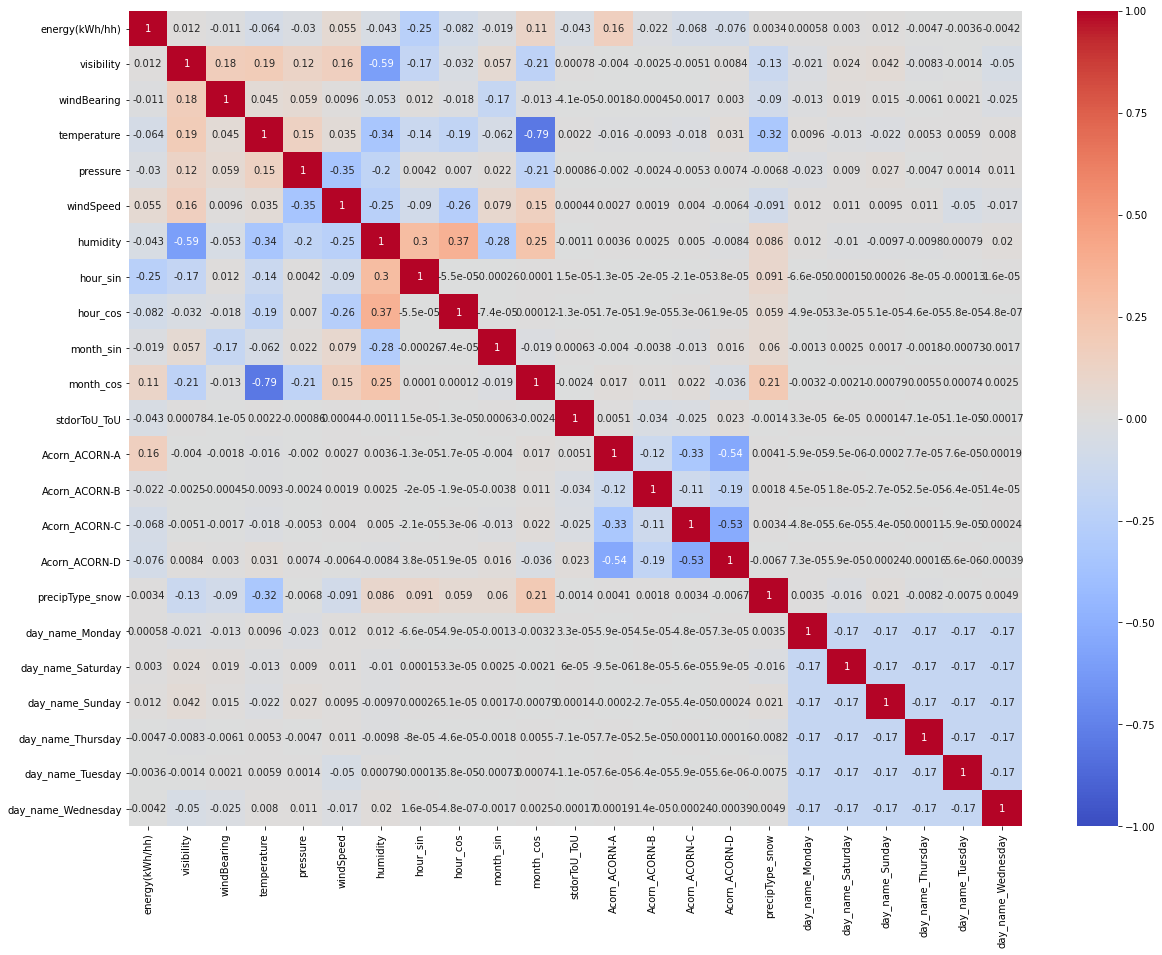

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt

correlatedData = dataset1_2_4_interpolated.corr(method='spearman')
plt.subplots(figsize=(20,15))
sns.heatmap(correlatedData, annot=True,cmap = 'coolwarm', vmin = -1)# ,vmin =-1, vmax=1

This correlation map shows us which feature correlates with which feature how much. For example the cosinus value of the moth correlates strong negatively with the temperature. That make sense obvioulsy since the temperature varies over the year.
We are looking for correlations with energy consumption, to get an idea which features mightbe important to predict it.

In [412]:
correlations = []
for label, content in correlatedData.items():
    valuecounter = 0 
    for value in content:
        value = abs(value)
        correlations.append([value, [label, content.axes[0][valuecounter]]])
        valuecounter += 1
sortedCorrelations = sorted(correlations)


#correlations ranking
print("Most correlations with energy consumption:")
for i in range (0,len(sortedCorrelations),2):
    current = sortedCorrelations[-i]
    energy = False
    other = None
    for item in current[1]:
        if 'energy(kWh/hh)' in item:
            energy= True
        else:
            other = item
    if energy:
        print(str(round(current[0], 3)) + " " + other)

Most correlations with energy consumption:
0.246 hour_sin
0.164 Acorn_ACORN-A
0.112 month_cos
0.082 hour_cos
0.076 Acorn_ACORN-D
0.068 Acorn_ACORN-C
0.064 temperature
0.055 windSpeed
0.043 humidity
0.043 stdorToU_ToU
0.03 pressure
0.022 Acorn_ACORN-B
0.019 month_sin
0.012 day_name_Sunday
0.012 visibility
0.011 windBearing
0.005 day_name_Thursday
0.004 day_name_Wednesday
0.004 day_name_Tuesday
0.003 precipType_snow
0.003 day_name_Saturday
0.001 day_name_Monday


As expected time realted features like hour and moth correlate with the energy consumption. Interestingly also the ACORN-groups, especially ACORN-Goup A seems to be important.

To get a better understanding about the independence ofthe features we will calculate the Variance inflation factor (VIF) for each feature.
"Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model."
[https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=Variance%20inflation%20factor%20(VIF)%20is,only%20that%20single%20independent%20variable], 18.01.2020

Ideally the VIF of all features is low, which means below 10.


In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = dataset1_2_4_interpolated.assign(const=1)
vifs = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vifs

energy(kWh/hh)            1.094061
visibility                1.677915
windBearing               1.105719
temperature               3.955843
pressure                  1.315854
windSpeed                 1.417943
humidity                  2.652504
hour_sin                  1.286691
hour_cos                  1.380275
month_sin                 1.351266
month_cos                 3.186323
stdorToU_ToU              1.011331
Acorn_ACORN-A            90.607056
Acorn_ACORN-B            18.945418
Acorn_ACORN-C            87.806435
Acorn_ACORN-D           118.852397
precipType_snow           1.215839
day_name_Monday           1.718054
day_name_Saturday         1.718600
day_name_Sunday           1.721118
day_name_Thursday         1.722537
day_name_Tuesday          1.724099
day_name_Wednesday        1.723763
const                 12664.037504
dtype: float64

The VIF of the ACORN-groups is higher than 10, which means they are not independent from other variables in the model and might cause problems. We will stick to them for now anyway and check the performance.

# Algorithms

We are going to try out simple linear regression, a support vector machine, since it almost alwas gives a good benchmark how good a model can perform on the data and is not as vulnerable to possible outliers. Also an extreme gradient boosting will be applied, since it recently has become quite famous for tabular data. 

Also a guess based on the average energy consumtion will be performed.

We use scikit-learn to apply these algorithms. This library is very well documented, a huge comminuty behind it, the models are chosen and implemented by a team of experts and its stable and easy to use. Also it covers most machine-learning tasks.


## Prepare Data

To prepare our dataset for the algorithms we normalize and standardize our data after plitting it in test and train data.

In [275]:
from sklearn import linear_model
X = dataset1_2_4_interpolated.loc[:, dataset1_2_4_interpolated.columns != 'energy(kWh/hh)']
y = dataset1_2_4_interpolated['energy(kWh/hh)']

In [276]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [277]:
sc_X = StandardScaler()
sc_y = StandardScaler()

#normalize and standardize
x_train_transformed = sc_X.fit_transform(x_train)
x_test_transformed = sc_X.fit_transform(x_test)
y_train_transformed = sc_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).reshape(-1, )
y_test_transformed = sc_y.fit_transform(y_test.to_numpy().reshape(-1, 1)).reshape(-1, )

## Simple average guessing

In [274]:
average = dataset1_2_4_interpolated['energy(kWh/hh)'].sum()/dataset1_2_4_interpolated['energy(kWh/hh)'].shape[0]
average

0.30372869914531475

In [284]:
predictions = np.full((len(y_test)), average)
predictions

array([0.3037287, 0.3037287, 0.3037287, ..., 0.3037287, 0.3037287,
       0.3037287])

In [285]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

0.2477840043141714

If we had to guess every energy consumption our average error would be 0.247 kWh.

## Linear Regression

In [287]:
model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train_transformed)

LinearRegression()

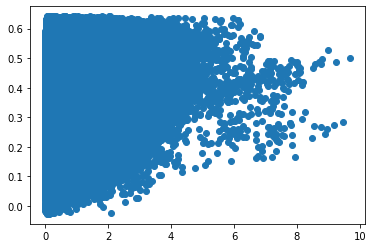

In [288]:
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))
plt.scatter(y_test, predictions)


In [289]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions))

0.2319512435735595

Trying to predict the energy consumption using linear regression only improves our guessing approach by a little margin to an average error of 0.232 kWh.

## Support Vector Regression

In [110]:
from sklearn.svm import LinearSVR
regressor = LinearSVR(random_state=0, tol=1e-5)
#regressor = SVR(kernel='rbf')
regressor.fit(x_train_transformed, y_train_transformed)

/home/jh234/anaconda3/envs/ads/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=0, tol=1e-05)

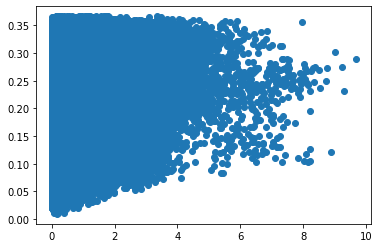

In [111]:
#5 Predicting results
predictions = sc_y.inverse_transform((regressor.predict(sc_X.transform(np.array(x_test)))))
plt.scatter(y_test, predictions)


In [113]:
metrics.mean_absolute_error(y_test, predictions)

0.20685409894099197

As expected the support vector machine works better. Eventhough a mean error of 0.206kWh is still not a satisfying result.

## XGBoost

In [117]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [136]:
model.fit(x_train_transformed, y_train_transformed)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [138]:
# make predictions for test data
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))

# evaluate predictions
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
print("mean_absolute_error: " + str(mean_absolute_error))

mean_absolute_error: 0.22371257870111363


The extreme boost gradient apporach does not beat the support vector machine in this case. The mean error is 0.224 kWh.

## Conclusion and next  experiments
All algorithms perform quite inaccurate and do not much better than guessing the average. To further improve the accuracy we will try to stick only to the features which corelate the most with the energy consumption:

Most correlation with energy consumption:

0.246 hour_sin

0.164 Acorn_ACORN-A

0.112 month_cos

0.082 hour_cos

0.076 Acorn_ACORN-D

0.068 Acorn_ACORN-C

0.064 temperature

0.055 windSpeed

0.043 humidity

0.043 stdorToU_ToU


In [290]:
less_features_dataset = dataset1_2_4_interpolated[['energy(kWh/hh)','Acorn_ACORN-A', 'month_cos', 'hour_cos',\
                                                   'Acorn_ACORN-D', 'Acorn_ACORN-C', 'temperature', 'windSpeed',\
                                                  'humidity','stdorToU_ToU']]
less_features_dataset

,energy(kWh/hh),Acorn_ACORN-A,month_cos,hour_cos,Acorn_ACORN-D,Acorn_ACORN-C,temperature,windSpeed,humidity,stdorToU_ToU
1,0.000,1,-1.836970e-16,0.965926,0,0,13.090,6.770,0.890,0
2,0.000,1,-1.836970e-16,0.965926,0,0,12.815,6.615,0.875,0
3,0.000,1,-1.836970e-16,0.866025,0,0,12.540,6.460,0.860,0
4,0.000,1,-1.836970e-16,0.866025,0,0,12.240,6.415,0.850,0
5,0.000,1,-1.836970e-16,0.707107,0,0,11.940,6.370,0.840,0
...,...,...,...,...,...,...,...,...,...,...
17601104,0.343,0,8.660254e-01,0.866025,1,0,4.100,3.020,0.840,0
17601105,0.906,0,8.660254e-01,0.866025,1,0,4.015,2.885,0.845,0
17601106,0.252,0,8.660254e-01,0.965926,1,0,3.930,2.750,0.850,0
17601107,0.214,0,8.660254e-01,0.965926,1,0,3.870,2.640,0.850,0


<AxesSubplot:>

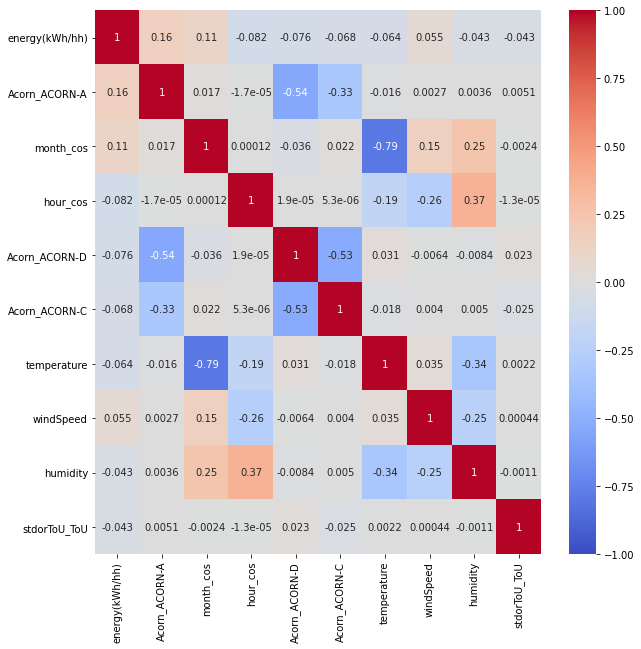

In [291]:
correlatedData = less_features_dataset.corr(method='spearman')
plt.subplots(figsize=(10,10))
import seaborn as sns
sns.heatmap(correlatedData, annot=True,cmap = 'coolwarm', vmin = -1)# ,vmin =-1, vmax=1

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = less_features_dataset.assign(const=1)
vifs = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vifs

energy(kWh/hh)     1.044381
Acorn_ACORN-A      5.339351
month_cos          2.738437
hour_cos           1.268866
Acorn_ACORN-D      6.549076
Acorn_ACORN-C      5.175828
temperature        2.889157
windSpeed          1.138032
humidity           1.416585
stdorToU_ToU       1.003608
const             93.136891
dtype: float64

Calculating the varinace inflation factors now, we dont get a VIF factor higher than 10 which is a good sign, because all Varibles seem to be independent from the others.

## Prepare Data - less features

In [293]:
from sklearn import linear_model
X = less_features_dataset.loc[:, less_features_dataset.columns != 'energy(kWh/hh)']
y = less_features_dataset['energy(kWh/hh)']

In [294]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [295]:
sc_X = StandardScaler()
sc_y = StandardScaler()

#normalize and standardize
x_train_transformed = sc_X.fit_transform(x_train)
x_test_transformed = sc_X.fit_transform(x_test)
y_train_transformed = sc_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).reshape(-1, )
y_test_transformed = sc_y.fit_transform(y_test.to_numpy().reshape(-1, 1)).reshape(-1, )

## Linear Regression - less features

In [299]:
model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train_transformed)

LinearRegression()

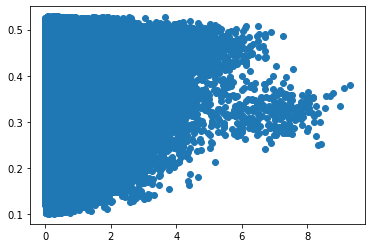

In [300]:
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))
plt.scatter(y_test, predictions)


In [302]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

0.24164720091151948

## XGBoost - less features

In [303]:
model = XGBRegressor()

In [304]:
model.fit(x_train_transformed, y_train_transformed)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [305]:
# make predictions for test data
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))

# evaluate predictions
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
print("mean_absolute_error: " + str(mean_absolute_error))

mean_absolute_error: 0.22902721151000385


## Conclusion and next  experiments
Surprisingly both algorithms perform worse with less, more with consumption correlated features. Appearently the missing features are important to the model even though they dont correlate that much with the energy consumption.

Another option is to remove all rows with more consumption than 2.5 kWh from train, since most values are below that and highervalues can be seen as outliers.

<AxesSubplot:ylabel='Density'>

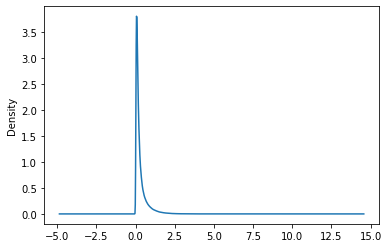

In [120]:
dataset1_2_4_interpolated['energy(kWh/hh)'].plot(kind='kde')

## Prepare Data - remove outliers

In [309]:
from sklearn import linear_model
X = dataset1_2_4_interpolated.loc[:, dataset1_2_4_interpolated.columns != 'energy(kWh/hh)']
y = dataset1_2_4_interpolated['energy(kWh/hh)']

In [310]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [311]:
#from train remove all rows with more consumption than 2.5 kWh
rowindexes_remove = []
rowcount = 0
for row in y_train:
    if row > 2.5:
        rowindexes_remove.append(rowcount)
    rowcount += 1
    
y_train = y_train.drop(y_train.index[rowindexes_remove])
x_train = x_train.drop(x_train.index[rowindexes_remove])

In [312]:
sc_X = StandardScaler()
sc_y = StandardScaler()

#normalize and standardize
x_train_transformed = sc_X.fit_transform(x_train)
x_test_transformed = sc_X.fit_transform(x_test)
y_train_transformed = sc_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).reshape(-1, )
y_test_transformed = sc_y.fit_transform(y_test.to_numpy().reshape(-1, 1)).reshape(-1, )

## Linear Regression - removed outliers

In [313]:
model = linear_model.LinearRegression()
model.fit(x_train_transformed, y_train_transformed)

LinearRegression()

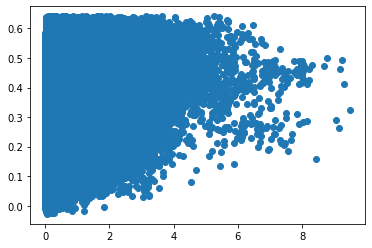

In [314]:
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))
plt.scatter(y_test, predictions)


In [315]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

0.23184445922120786

## XGBoost - removed outliers

In [316]:
model = XGBRegressor()

In [317]:
model.fit(x_train_transformed, y_train_transformed)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [318]:
# make predictions for test data
predictions = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(x_test)))))

# evaluate predictions
mean_absolute_error = metrics.mean_absolute_error(y_test, predictions)
print("mean_absolute_error: " + str(mean_absolute_error))

mean_absolute_error: 0.21539252612420307


## Conclusion
Removing the outliers from the energy consumption of training data improves the performce only minimal:
* Linear regression from 0.2320 kWh to 0.2318 kWh
* Slight improvement from 0.2237 kWh to 0.2154 kWh

We didnt try it again for the support vector machine because because it needed several hours to converge. It is likely that it would also have improved.


## Estimated energy consumption for custom Data

At a last step we want to estimate the energy consumption for custom Data. Numeric values would have to input a set of features. From them we determine the one-hot-encoded variables and the sine values of the time realted variables. Also we calculate the most probable ACORN-group which is besides the other features forwarded to the regression model. The model then predicts the energy consumption of the given household for a given time.

In [418]:
#gather example user data

#variables the user has to input
visibility= 5.97
windBearing = 104
temperature = 0.24
pressure = 1016.76
windSpeed = 2.77
humidity = 0.91
age = 26
number_of_persons = 6
house_value = 200000
yearly_income = 50000
month_1_12 = 1
day = 'monday'
hour_0_23 = 12 
contract = "std" #ToU
precipType = "rain" #snow


#variable we will calculate ourselfes
hour_sin = None
hour_cos = None
month_sin= None
month_cos= None
stdorToU_ToU= None
Acorn_ACORN_A= None
Acorn_ACORN_B= None
Acorn_ACORN_C= None
Acorn_ACORN_D= None
precipType_snow= None
day_name_Monday= None
day_name_Saturday= None
day_name_Sunday= None
day_name_Thursday= None
day_name_Tuesday= None
day_name_Wednesday= None

##############
#preprocessing
#############

#one-hot-encoded-values
if contract=='std':
    stdorToU_ToU = 0
else:
    stdorToU_ToU = 1
    
if contract=='rain':
    precipType_snow = 0
else:
    precipType_snow = 1

#time related
hour_sin = np.sin(hour_0_23*(2.*np.pi/24))
hour_cos = np.cos(hour_0_23*(2.*np.pi/24))

month_sin = np.sin((month_1_12-1)*(2.*np.pi/12))
month_cos = np.cos((month_1_12-1)*(2.*np.pi/12))


if day=='monday':
    day_name_Monday= 1
    day_name_Saturday= 0
    day_name_Sunday= 0
    day_name_Thursday= 0
    day_name_Tuesday= 0
    day_name_Wednesday= 0
elif day=='tuesday':
    day_name_Monday= 0
    day_name_Saturday= 0
    day_name_Sunday= 0
    day_name_Thursday= 0
    day_name_Tuesday= 1
    day_name_Wednesday= 0
elif day=='wednesday':
    day_name_Monday= 0
    day_name_Saturday= 0
    day_name_Sunday= 0
    day_name_Thursday= 0
    day_name_Tuesday= 0
    day_name_Wednesday= 1
elif day=='thursay':
    day_name_Monday= 0
    day_name_Saturday= 0
    day_name_Sunday= 0
    day_name_Thursday= 1
    day_name_Tuesday= 0
    day_name_Wednesday= 0
elif day=='friday':
    day_name_Monday= 0
    day_name_Saturday= 0
    day_name_Sunday= 0
    day_name_Thursday= 0
    day_name_Tuesday= 0
    day_name_Wednesday= 0
elif day=='saturday':
    day_name_Monday= 0
    day_name_Saturday= 1
    day_name_Sunday= 0
    day_name_Thursday= 0
    day_name_Tuesday= 0
    day_name_Wednesday= 0
elif day=='sunday':
    day_name_Monday= 0
    day_name_Saturday= 0
    day_name_Sunday= 1
    day_name_Thursday= 0
    day_name_Tuesday= 0
    day_name_Wednesday= 0
    


#ACORN related
ACORNcategories=[]


if -1 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 0-4')
elif 4 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 18-24')
elif 17 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 18-24')
elif 24 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 25-34')
elif 34 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 35-49')
elif 49 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 50-64')
elif 64 < age < 5:
    ACORNcategories.append('POPULATION_Age_Age 65-74')
else:
    ACORNcategories.append('POPULATION_Age_Aged 75 plus')

    

if number_of_persons==1:
    ACORNcategories.append('FAMILY_Household Size_Household size : 1 person')
elif number_of_persons==2:
    ACORNcategories.append('FAMILY_Household Size_Household size : 2 persons')
elif 2 < number_of_persons < 5:
    ACORNcategories.append('FAMILY_Household Size_Household size : 3-4 persons')
else:
    ACORNcategories.append('FAMILY_Household Size_Household size : 5+ persons')



if house_value<100001:
    ACORNcategories.append('HOUSING_House Value_House Value up to 100k')
elif 100000<house_value<150001:
    ACORNcategories.append('HOUSING_House Value_House Value 100k-150k')
elif 150000<house_value<250001:
    ACORNcategories.append('HOUSING_House Value_House Value 150k-250k')
elif 250000<house_value<500001:
    ACORNcategories.append('HOUSING_House Value_House Value 250k-500k')
elif 500000<house_value<750001:
    ACORNcategories.append('HOUSING_House Value_House Value 500k-750k')
elif 750000<house_value<1000001:
    ACORNcategories.append('HOUSING_House Value_House Value 750k-1m')
else:
    ACORNcategories.append('HOUSING_House Value_House Value 1m+')



if yearly_income<20001:
    ACORNcategories.append('FINANCE_Household Annual Income_£0-£20,000')
elif 20000<house_value<40001:
    ACORNcategories.append('FINANCE_Household Annual Income_£20,000-£40,000')
elif 150000<house_value<60001:
    ACORNcategories.append('FINANCE_Household Annual Income_£40,000-£60,000')
elif 250000<house_value<80001:
    ACORNcategories.append('FINANCE_Household Annual Income_£60,000-£80,000')
elif 500000<house_value<100001:
    ACORNcategories.append('FINANCE_Household Annual Income_£80,000-£100,000')
else:
    ACORNcategories.append('FINANCE_Household Annual Income_£100,000+')
    
    
number_of_cars = 0
if number_of_cars==0:
    ACORNcategories.append('TRANSPORT_Car Ownership_Number of Cars 0')
elif number_of_cars==1:
    ACORNcategories.append('TRANSPORT_Car Ownership_Number of Cars 1')
elif number_of_cars==2:
    ACORNcategories.append('TRANSPORT_Car Ownership_Number of Cars 2')
else:
    ACORNcategories.append('TRANSPORT_Car Ownership_Number of Cars 3+')

    
usecase = ACORN_details_relative.loc[ACORNcategories].copy()
usecase = usecase.append(pd.Series(usecase.sum(),name='Total_prop'))
acorngroup = usecase.idxmax(axis=1)["Total_prop"]
print("Most likely ACORN-Group:" ,acorngroup)

if acorngroup=="ACORN-A":
    Acorn_ACORN_A= 1
    Acorn_ACORN_B= 0
    Acorn_ACORN_C= 0
    Acorn_ACORN_D= 0
elif acorngroup=="ACORN-B":
    Acorn_ACORN_A= 0
    Acorn_ACORN_B= 1
    Acorn_ACORN_C= 0
    Acorn_ACORN_D= 0
elif acorngroup=="ACORN-C":
    Acorn_ACORN_A= 0
    Acorn_ACORN_B= 0
    Acorn_ACORN_C= 1
    Acorn_ACORN_D= 0
elif acorngroup=="ACORN-D":
    Acorn_ACORN_A= 0
    Acorn_ACORN_B= 0
    Acorn_ACORN_C= 0
    Acorn_ACORN_D= 1
else:
    #its acorngroup e
    Acorn_ACORN_A= 0
    Acorn_ACORN_B= 0
    Acorn_ACORN_C= 0
    Acorn_ACORN_D= 0

Most likely ACORN-Group: ACORN-A


We have calculated all inputs for the model, so we can use it now to predict the energy consumption.

In [419]:
custominput = [visibility,windBearing,temperature,pressure,windSpeed,humidity,hour_sin,hour_cos,month_sin,\
               month_cos,stdorToU_ToU,Acorn_ACORN_A,Acorn_ACORN_B,Acorn_ACORN_C,Acorn_ACORN_D,\
               precipType_snow,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday\
               ,day_name_Wednesday]

In [420]:
predictedC = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(custominput).reshape(1, -1)))))


In [421]:
sc_y.inverse_transform(predictedC)[0]

0.4411564

The predicted energy consumption for 30 minutes for the household at the given time is 0.4154584 kWh.

Influence of Temperature:

The temperatur was set to 0.24 degrees. To get an idea about the influece of the temperature we now set it to 30 degrees and compare the outcome.

In [422]:
temperature = 30
custominput = [visibility,windBearing,temperature,pressure,windSpeed,humidity,hour_sin,hour_cos,month_sin,\
               month_cos,stdorToU_ToU,Acorn_ACORN_A,Acorn_ACORN_B,Acorn_ACORN_C,Acorn_ACORN_D,\
               precipType_snow,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday\
               ,day_name_Wednesday]
predictedC = sc_y.inverse_transform((model.predict(sc_X.transform(np.array(custominput).reshape(1, -1)))))
sc_y.inverse_transform(predictedC)[0]

0.40626723

As the temperature rises the energy consumption drops. Thats understandable because for example less electrical heaters will be used and peopleare more likely to be outside.

## Overall conclusion and possible improvements

Our goal was to predict the currentenergy consumption of a single household in London. For that we have explored a small part of publicy available dataset to confirm that it contains meaningful and almost complete data. Some features like some ACORN-groups were underrepresented though. To understand the influence of weather data on energy consumption, we merged the weather data into the energy-consumption data and interpolated the missing values. We calculated the relative distribution of features over the ACORN-groups from the aboslute one. Therefore we were able to determine the most likely ACORN-group given a set of features from the ACORN-groups distribution table. To be able to use the dataset for prediction algorithms and correlation analysis, we transformed the categorical features to one-hot-encoded ones. We pointed out a few explainable correlations within the dataset and checked for variables indepence.

The chosen algorithms didnt improve the result alot compared to the average guessing approach, which resulted in a mean error of 0.2477 kWh. The support vector machine outperfomed the linear regression model achieving a mean error of 0.2068 kWh. The extreme boost gradient algorithm performed unexpected a little worse.

To further improve the performance one should probaby use the whole dataset with 112 files instead of only 12. It wasnt possible in this case because some calculations and modifications would have taken several hours. Using the whole dataset also could help to balance the ununderrepresented features out.
Another option would be to do a grid search over all features, so one could be sure about which combination of features would work and which wouldn´t. That would be a quite timeconsuming task of course, especially if the whole dataset with its 112 file is used.

Also it is possible that energy consumption depends on the features but only to a little extend, so that we can make only a vague guess about the current energy consumption of a specific household and it is not possible to predict it with a higher accuracy.

After all one can say our model works better then an average guess and seems to have understood the influence of some features as we have seen for example that temperature influence the prediction in an explainable way. We have shown dummy user data canbe used to actually predict the current energy consumption of a specific household. 

